In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test/ 255.0
y_train = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
print(y_train[0 : 3, :])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
print(f'Total data for traing: {x_train.shape[0]}, Train X shape: {x_train.shape}, Train y shape: {y_train.shape}')
print(f'Total data for test: {x_test.shape[0]}, Test X shape: {x_test.shape}, Test y shape: {y_test.shape}')

Total data for traing: 50000, Train X shape: (50000, 32, 32, 3), Train y shape: (50000, 10)
Total data for test: 10000, Test X shape: (10000, 32, 32, 3), Test y shape: (10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

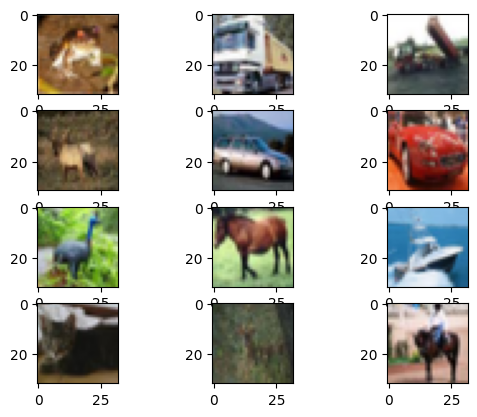

In [4]:
import matplotlib.pyplot as plt
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_train[i])
plt.show

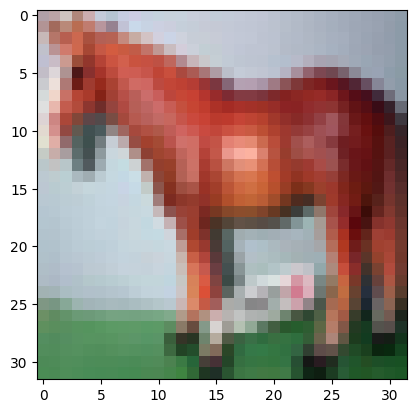

In [5]:
i = 318
plt.imshow(x_train[i])
plt.show()

In [6]:
datAGM = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datAGM.fit(x_train)
def Cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(1024, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = Cnn_model()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 32
epochs = 86
history = model.fit(datAGM.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test_onehot))
test_loss, test_acc = model.evaluate(x_test, y_test_onehot, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,692,554 (56.05 MB)

 Trainable params: 14,687,498 (56.03 MB)

 Non-trainable params: 5,056 (19.75 KB)

Epoch 1/86


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.3007 - loss: 2.1324 - val_accuracy: 0.4785 - val_loss: 1.5708
Epoch 2/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4934 - loss: 1.4197 - val_accuracy: 0.5351 - val_loss: 1.4483
Epoch 3/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5834 - loss: 1.1807 - val_accuracy: 0.6736 - val_loss: 0.9549
Epoch 4/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6284 - loss: 1.0609 - val_accuracy: 0.6797 - val_loss: 0.9364
Epoch 5/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6718 - loss: 0.9482 - val_accuracy: 0.7650 - val_loss: 0.7063
Epoch 6/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.6907 - loss: 0.8997 - val_accuracy: 0.6942 - val_loss: 0.9806
Epoch 7/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7068 - loss: 0.8389 - val_accuracy: 0.7602 - val_loss: 0.7383
Epoch 8/86
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7326 - loss: 0.77

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1000
           1       0.94      0.97      0.95      1000
           2       0.92      0.89      0.90      1000
           3       0.88      0.78      0.83      1000
           4       0.89      0.92      0.90      1000
           5       0.89      0.85      0.87      1000
           6       0.83      0.97      0.90      1000
           7       0.95      0.93      0.94      1000
           8       0.94      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Axes: >

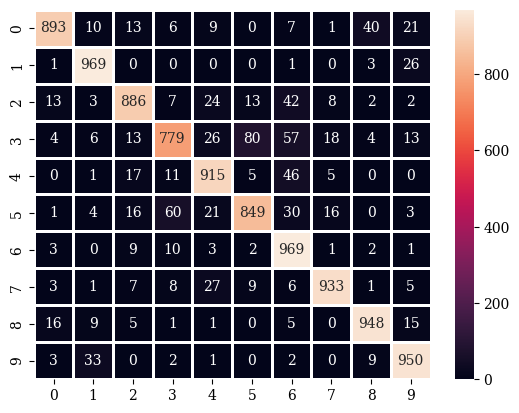

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

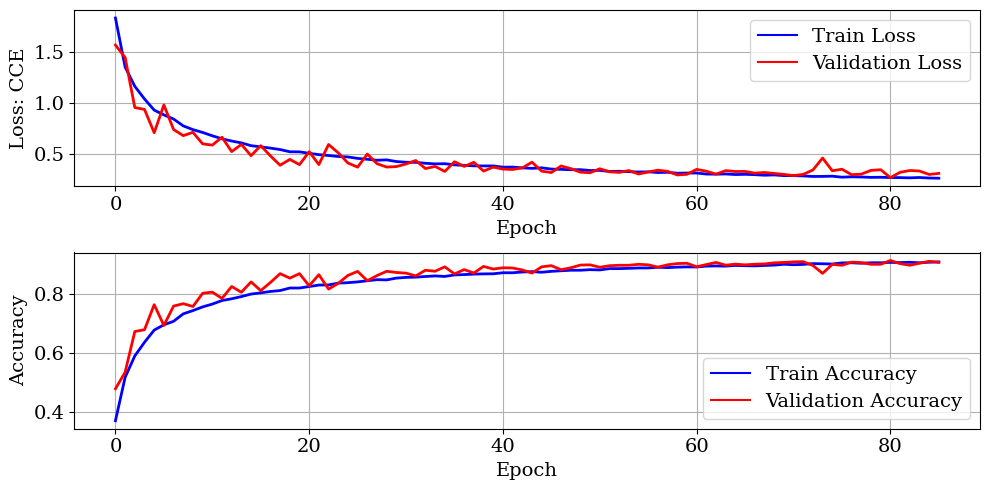

In [11]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'serif'
fontsize = 14
train_loss = history.history['loss']
val_loss = history.history['val_loss']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
axs[0].plot(train_loss, label='Train Loss', color ='b')
axs[0].plot(val_loss, label='Validation Loss', color='r')
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)
train_acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
axs[1].plot(train_acc, label='Train Accuracy', color ='b')
axs[1].plot(val_acc, label='Validation Accuracy', color='r')
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)
fig.tight_layout()

plt.show()

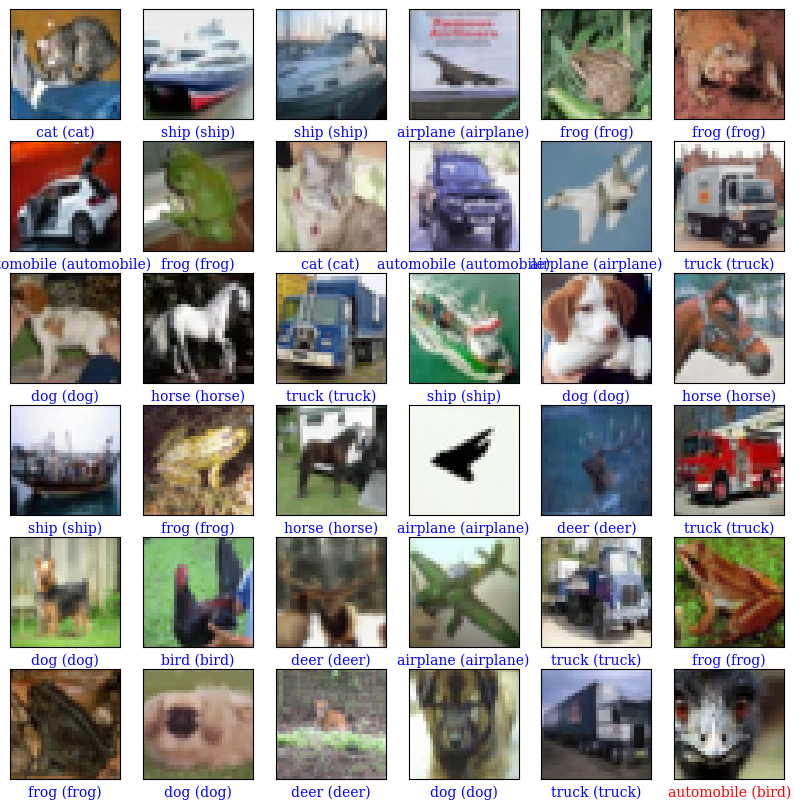

In [18]:
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(32,32,3),cmap=plt.cm.binary)
    predicted_label=np.argmax(y_pred[i])
    true_label=np.argmax(y_test_onehot[i])
    if predicted_label==true_label:
        color ='blue'
    else:
        color='red'
    plt.xlabel("{} ({})".format(cifar_classes[predicted_label],cifar_classes[true_label]),color=color)
plt.show()

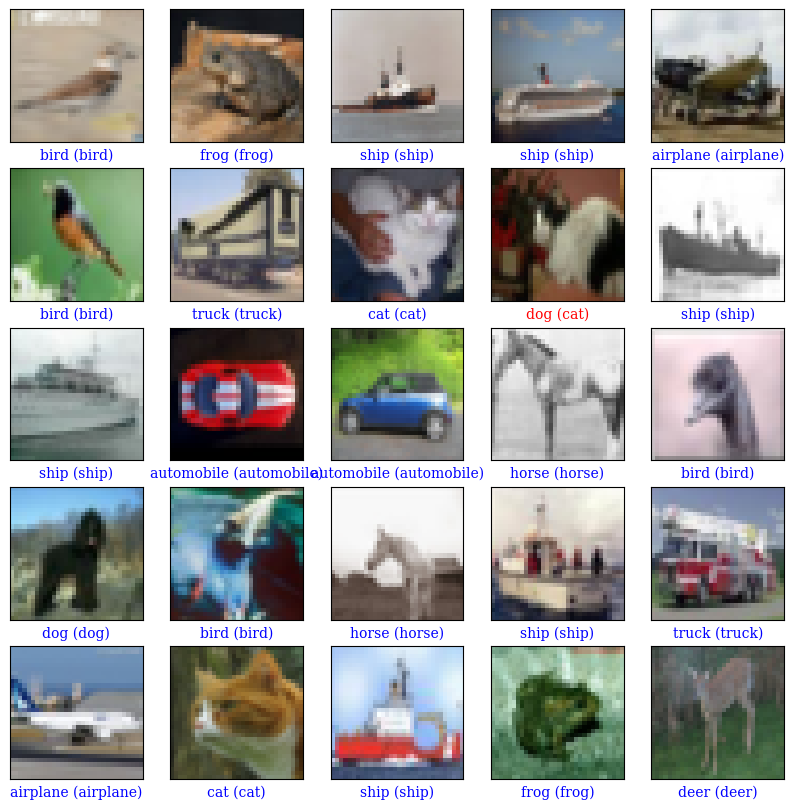

In [25]:
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i+70].reshape(32,32,3),cmap=plt.cm.binary)
    predicted_label=np.argmax(y_pred[i+70])
    true_label=np.argmax(y_test_onehot[i+70])
    if predicted_label==true_label:
        color ='blue'
    else:
        color='red'
    plt.xlabel("{} ({})".format(cifar_classes[predicted_label],cifar_classes[true_label]),color=color)
plt.show()